# Text Summarization for Okaz news website


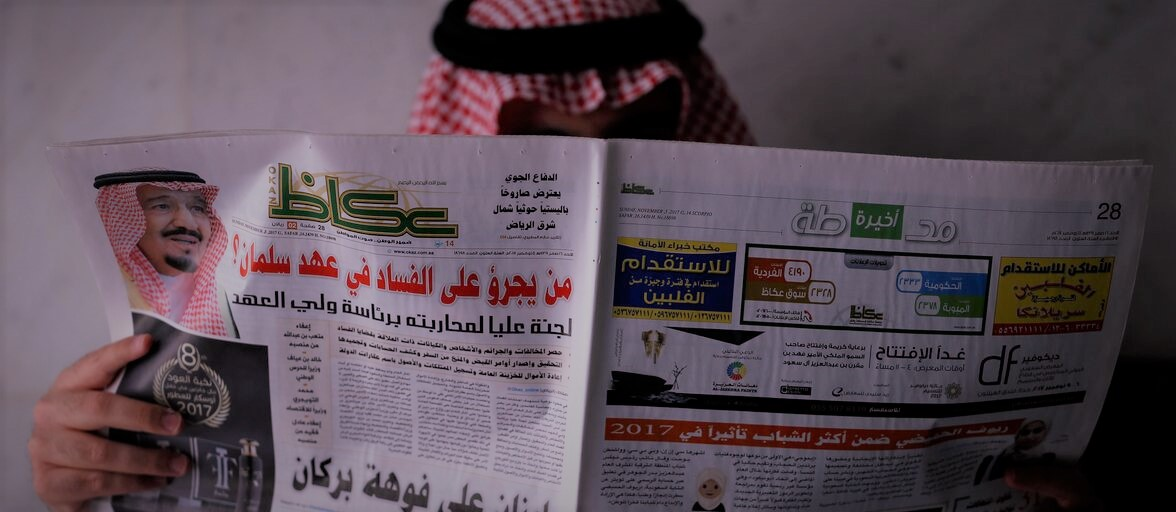

# Web Scraping 
#### Web Scraping is the process through which we extract data from a website, and save it in a form which is easy to read, to understand and to work on.

#### My goal in this project is to summarize the article “ كل فتاة بأبيها معجبة” on the Okaz newspaper website. It is an article about a girl who talks about International Father’s Day, its goal, and the purpose of commemorating and remembering it.

# How does web scraping work?

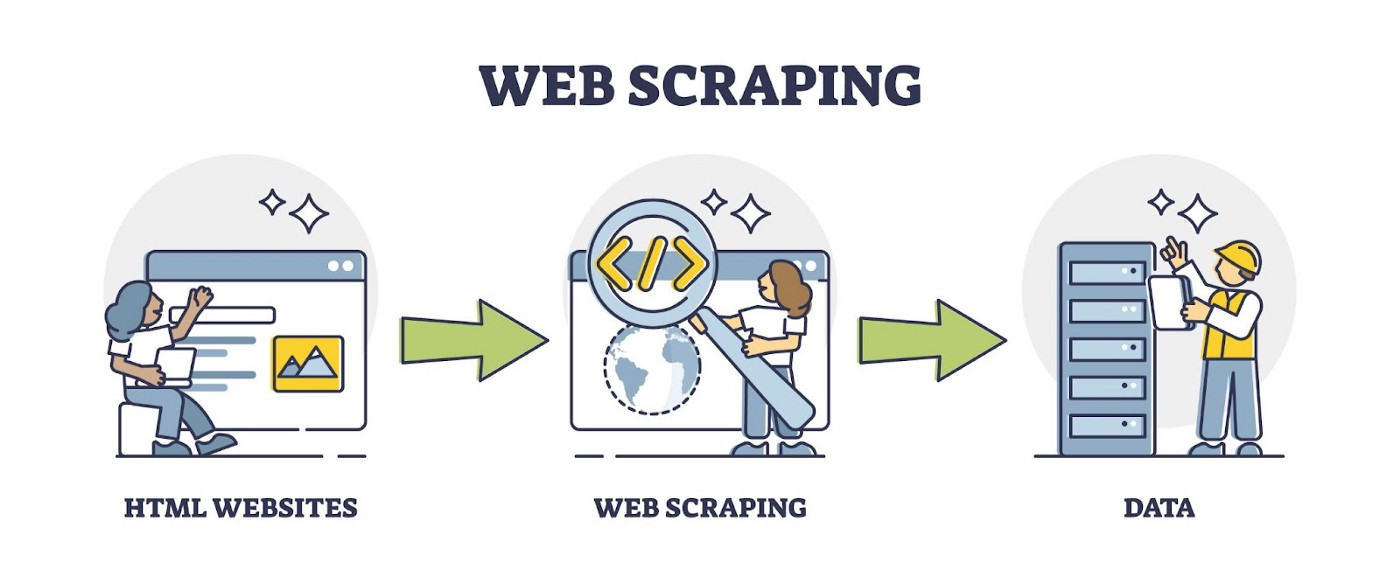

#### To understand web scraping, it’s important to first understand that web pages are built with text-based mark-up languages – the most common being HTML.

#### A mark-up language defines the structure of a website’s content. Since there are universal components and tags of mark-up languages, this makes it much easier for web scrapers to pull all the information that it needs. Once the HTML is parsed, the scraper then extracts the necessary data and stores it.

#### **To extract data using web scraping with python, you need to follow these basic steps:**

1. Find the URL that you want to scrape
2. Inspecting the Page
3. Find the data you want to extract
4. Write the code
5. Run the code and extract the data
6. Store the data in the required format 

# Import Necessary Libraries
#### Libraries used for Web Scraping As we know, Python has various applications and there are different libraries for different purposes. In our further demonstration, we will be using the following libraries:

#### **1.** **Natural language Toolkit (NLTK):**   NLTK is a complete toolkit for all NLP techniques.
#### **2.** **urllib** bold text is a Python 3 package that allows you to access, and interact with, websites using their URLs (Uniform Resource Locator). 
#### **3.** **The requests** library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.
#### 4. **BeautifulSoup:** Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that are helpful to extract the data easily.

In [ ]:
# Importing the required Libraries
import nltk 
import urllib
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.probability import FreqDist
from collections import defaultdict
from nltk.corpus import stopwords 
from string import punctuation
from bs4 import BeautifulSoup
from heapq import nlargest
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Step1:** Find the URL that you want to scrape

In [ ]:
articleURL = 'https://www.okaz.com.sa/articles/authors/2108456'

## **Step 2:**  Write the Basic fundamentals code of web scraping
Now that we have written the code to open the URL, it’s time to extract the data from the website. As mentioned earlier, the data we want to extract is nested in <'p'> tags. So, I will find the 'p' tags with those respective class names, extract the data and store the data in a variable. Refer to the code below:

In [ ]:
def getTextWapo(url):
  page = urllib.request.urlopen(url).read().decode('utf8','ignore')
  soup = BeautifulSoup(page,'lxml')
  text = '  '.join(map(lambda p: p.text, soup.find_all('p'))) 
  return text

In [ ]:
text = getTextWapo(articleURL)
sents = sent_tokenize(text)
sents

['\n\n                                                        كتاب ومقالات                                                    \n                                                    الخميس 23 يونيو 2022  01:05                                                  \n\n\n                                                    3185                                                    مشاهدة\n  \n\n  التاسع عشر من يونيو هو يوم الأب العالمي من كل عام، وعندما نعود لأصل هذه الأيام العالمية وأهدافها والغرض من إحيائها وتذكرها نجد أنها تمثل قضايا عامة مجتمعية مهمة مصنفة من منظمة الأمم المتحدة.',
 'فهناك أيام دولية تحدد من قبلهم ومن الدول الأعضاء ويتم اختيار هذه الأيام على أسس تخدم القضايا العامة التي تدعمها المنظمة بما يخص مثلا نشر السلام والتنمية المستدامة وحماية حقوق الإنسان ودعم العمل الإنساني.',
 'مثل هذه الأيام يوم السعادة، ويوم المرأة، ويوم الأب، وإلى آخره من هذه الأيام التي تعكس قيما عالية وقضايا هامة.',
 'البعض من الأشخاص يعتقد بتحريمها بغير دليل واضح أو جهل منهم ومحاربة كل ما يختلف عنهم في الرأي وبر

## **Step 3:** Summarizing 

#### **Terms Used:** 


**step 1:** *Tokenizers*
This divides a text into a series of tokens. In Tokenizers, there are three main tokens – sentence, word, and regex tokenizer. We will be using only the word and the sentence tokenizer.

**Step 2:** Remove the Stop Words and store them in a separate array of words.

**Step 3:** We can then create a frequency table of the words.

A Python Dictionary can keep a record of how many times each word will appear in the text after removing the stop words. We can use this dictionary over each sentence to know which sentences have the most relevant content in the overall text.

**Step 4:** Depending on the words it contains and the frequency table, we will assign a score to each sentence.

Here, we will use the word_tokenize() method that can be used to create the array of sentences. We will also need a dictionary to keep track of the score of each sentence, and we can later go through the dictionary to create a summary.
 

In [ ]:
def summarize(text, n): 
  sents = sent_tokenize(text)
  assert n <= len(sents) # check whether the text has required number of sentences 
  word_sent = word_tokenize(text.lower())
  _stopwords = set(stopwords.words('arabic') + list(punctuation))

  word_sent = [word for word in word_sent if word not in _stopwords and word !='\n' and word !='23' and word !='2022' and word !='3165' and word !='01:05']
  freq = FreqDist(word_sent)

  ranking = defaultdict(int)

  for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
      if w in freq:
        ranking[i]+= freq[w]

  sents_idx = nlargest(n,ranking , key= ranking.get)
  return[sents[j] for j in sorted(sents_idx)]

#### We can finally apply our summarizer on a set of articles extracted from the Okaz news feed:

In [ ]:
summarize(text, 3)

['وجدت هذا اليوم فرصة لأتحدث عن والدي الملهم وإنجازاته في حياته من باب الامتنان والشكر والاحترام، ولإيماني بأن تلك اللبوة من ذاك الأسد بنفس اعتقاد بأن (ذاك الشبل من ذاك الأسد).',
 'والدي ضابط متقاعد يحمل العديد من الصفات التي تجعلني أعجب به وأرى أنه رجل عصامي شهم بدأ حياته بمقومات حياة بسيطة جداً، لكنه صنع مستقبلاً مميزاً حافلاً بالإنجازات، خدم وطنه ودينه، فقد شارك في حرب الخليج وحماية الحرم المكي الشريف في قضية جهيمان.',
 'هذا والدي (سعيد) كيف لا أكون به معجبة بل لحد الغرور معجبة، حفظك الله وأدام صحتك وعافيتك أنت وأمي الغالية، هو من ذلك الجيل الطيب الذي تحمل صعوبات حياة وقدم تضحيات جبارة صنعت وطنا وواقعا أفضل وجيلاً حالياً يعترف بفضله، وليس كما تقول يا دكتور طارق الحبيب ولا يدعو على زمن لم يكن لهم قرار باختيار صعوباته ومعوقاته.']

# **Endnotes**
### Text summarization of articles can be performed by using the NLTK library and the BeautifulSoup library. This can help in saving time. Higher Deep learning techniques can be further used to get more optimum summarizations. 